# HW05 - Problem 5c

Performance evaluation. For each of the 3 datasets, train a decision tree and random forest and report your training and validation accuracies. You should be reporting 12 numbers (3 datasets × 2 classifiers × 2 data splits).


Program overhead:

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
import numpy as np
import decisiontree as dt
import randomforest as rf
import HW05_utils as ut
from matplotlib import pyplot as plt

Set the base directory for this homework

In [6]:
BASE_DIR = "/Users/mitch/Documents/Cal/2_2017_Spring/COMPSCI 289A - Intro to Machine Learning/HW05/"

Establish a size for the validation set as a fraction of the total training set

In [7]:
valfrac = 0.1

## SPAM
-----------
Calculate decision tree and random forest training/validation accuracies for the spam dataset.

Begin by importing data, shuffling, and separating into training and validation sets.

In [10]:
# Import
SPAM_PATH = "Data/hw5_spam_dist/spam_data.mat"

spam_data = ut.load_data(SPAM_PATH,BASE_DIR,'training_data')
spam_labels = ut.load_data(SPAM_PATH,BASE_DIR,'training_labels').T
spam_test = ut.load_data(SPAM_PATH,BASE_DIR,'test_data')

In [11]:
# Shuffle
spamdata, spamlabels = ut.shuffle_data(spam_data,spam_labels)

In [12]:
# Separate
spamtraindata,spamvaldata = ut.val_partition(spamdata,valfrac)
spamtrainlabels,spamvallabels = ut.val_partition(spamlabels,valfrac)

### Spam Random Forest 

Create and train a random forest classifier using the spam data and labels.

In [14]:
spam_RFclassifier = rf.RandomForest(treedepth=23,ntrees=100)

In [15]:
spam_RFclassifier.train(spamtraindata,spamtrainlabels)

Calculate the validation accuracy using the trained decision tree.

In [16]:
spampredictions = spam_RFclassifier.predict(spamvaldata)

In [17]:
spamvalAcc = ut.val_accuracy(spampredictions,spamvallabels)    
print('Validation Accuracy = %.3f%%'%(100*spamvalAcc))

Validation Accuracy = 75.992%


Use this procedure to determine the optimal value for the tree depth hyperparameter. (Re-use the function looping over depths in spam)

In [21]:
maxdepth = 25
depthstep = 2

In [15]:
spam_RFclassifier.train(spamtraindata,spamtrainlabels)

Calculate the validation accuracy using the trained decision tree.

In [16]:
spampredictions = spam_RFclassifier.predict(spamvaldata)

In [17]:
spamvalAcc = ut.val_accuracy(spampredictions,spamvallabels)    
print('Validation Accuracy = %.3f%%'%(100*spamvalAcc))

Validation Accuracy = 75.992%


Use this procedure to determine the optimal value for the tree depth hyperparameter. (Re-use the function looping over depths in spam)

In [21]:
maxdepth = 25
depthstep = 2

In [22]:
spamRF_Accs=testdepths('RF',spamtraindata,spamtrainlabels,spamvaldata,spamvallabels,maxdepth,depthstep,ntrees=100)

Tested up to depth 5
Tested up to depth 15
Tested up to depth 25


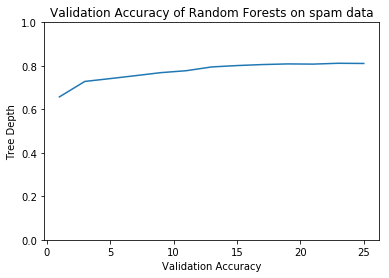

Max accuracy of 81.18% for depth of 23


In [23]:
plotdepthAccs(spamRF_Accs,'Validation Accuracy of Random Forests on spam data')

Make random forest predictions for the best depth according to test data, and save to a csv file for upload to Kaggle (0-indexing).

In [114]:
spamRFoutfilename ='../spamRF_accuracies.txt'
bestspamRF = train_optimal('RF',np.array([[23,1],[0,0]]),spamdata,spamlabels,spamRFoutfilename)
#bestspamRF = train_optimal(spamRF_Accs,spamdata,spamlabels,spamoutfilename)
write_Accs(bestspamRF,
           [spamtraindata,spamvaldata],
           [spamtrainlabels,spamvallabels],
           ['Training','Validation'],
           spamRFoutfilename,
          )

In [24]:
#spamRFpredictions_csv = save_optimal(spamRF_Accs,spamdata,spamlabels,spam_test,indexing=0)
#np.savetxt(BASE_DIR+'spam_RF_testpredictions.csv',spamRFpredictions_csv,fmt='%i',delimiter=',',header='Id,Category',comments='')